# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [115]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint as pprint
from scipy.stats import linregress

from pandas.io.json import json_normalize

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
url = "http://api.openweathermap.org/data/2.5/weather?"

final_url = url + "appid=" + weather_api_key + "&q=" 

# Get the temperature from the response
# print(f"The weather API responded with: {weather_json}.")
 
    
# weather_response = requests.get(final_url + cities[0])
# weather_json = weather_response.json()

pp = pprint.PrettyPrinter(indent=4, width=80, compact=False)

# Testing PPrint and jsonifying the code so I can read the key names
# pp.pprint(weather_json)
# weather_json['name']
# weather_json['id']
# print(f"name: {weather_json['name']}, city id: {weather_json['id']}")

# Error message;
# {'cod': '404', 'message': 'city not found'}

counter = 0
set_counter = 0
city_data = []


# 	City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date

for city in cities:
    formatted_weath_json = {}
    counter += 1
    if counter == 50:
        set_counter += 1
#     if counter >= 500:
# #         print(weather_json)
#         break
    final_url = url + "appid=" + weather_api_key + "&q=" + city
    
    weather_response = requests.get(final_url)
    weather_json = weather_response.json()
    
    if weather_json['cod'] == '404':
        print('City not found. Skipping...')
        continue 

    # Below assembles formatted json
    formatted_weath_json['City'] = weather_json['name']
    formatted_weath_json['Lat'] = weather_json['coord']['lon']
    formatted_weath_json['Lng'] = weather_json['coord']['lat']
    formatted_weath_json['Max Temp'] = weather_json['main']['temp_max']
    formatted_weath_json['Humidity'] = weather_json['main']['humidity']
    formatted_weath_json['Cloudiness'] = weather_json['clouds']['all']
    formatted_weath_json['Wind Speed'] = weather_json['wind']['speed']
    formatted_weath_json['Country'] = weather_json['sys']['country']
    formatted_weath_json['Date'] = weather_json['dt']
    

    # Are "sets" just a formatting thing or is it relevant for grouping?
        
    city_data.append(formatted_weath_json)
    print(f"Processing Record {counter} of Set {set_counter} |{weather_json['name']}")

City not found. Skipping...
Processing Record 2 of Set 1 |Chokurdakh
City not found. Skipping...
Processing Record 4 of Set 1 |Rikitea
Processing Record 5 of Set 1 |Albany
Processing Record 6 of Set 1 |Mataura
Processing Record 7 of Set 1 |Betanzos
Processing Record 8 of Set 1 |Saint Paul Harbor
Processing Record 9 of Set 1 |Bajil
Processing Record 10 of Set 1 |Ushuaia
Processing Record 11 of Set 1 |Bethel
Processing Record 12 of Set 1 |Anito
Processing Record 13 of Set 1 |Farrukhnagar
Processing Record 14 of Set 1 |Nantucket
Processing Record 15 of Set 1 |Shunyi
Processing Record 16 of Set 1 |Camacha
Processing Record 17 of Set 1 |Punta Arenas
Processing Record 18 of Set 1 |Qaanaaq
Processing Record 19 of Set 1 |Saint Anthony
Processing Record 20 of Set 1 |Bluff
City not found. Skipping...
Processing Record 22 of Set 1 |Tuy Hoa
Processing Record 23 of Set 1 |Jamestown
City not found. Skipping...
Processing Record 25 of Set 1 |Kerema
Processing Record 26 of Set 1 |Kapaa
Processing Reco

Processing Record 206 of Set 1 |Aksay
Processing Record 207 of Set 1 |Choma
City not found. Skipping...
Processing Record 209 of Set 1 |Dukat
Processing Record 210 of Set 1 |Nipawin
Processing Record 211 of Set 1 |Cayenne
Processing Record 212 of Set 1 |Khatanga
Processing Record 213 of Set 1 |Garoowe
Processing Record 214 of Set 1 |Gorontalo
Processing Record 215 of Set 1 |Aswān
Processing Record 216 of Set 1 |Tazovsky
Processing Record 217 of Set 1 |Faanui
Processing Record 218 of Set 1 |Mackay
Processing Record 219 of Set 1 |Leshukonskoye
Processing Record 220 of Set 1 |Nara
Processing Record 221 of Set 1 |Puerto Escondido
Processing Record 222 of Set 1 |Raudeberg
Processing Record 223 of Set 1 |Chara
Processing Record 224 of Set 1 |Thai Binh
Processing Record 225 of Set 1 |Broken Hill
Processing Record 226 of Set 1 |Clyde River
Processing Record 227 of Set 1 |Sorong
Processing Record 228 of Set 1 |Wanning
Processing Record 229 of Set 1 |Caravelas
Processing Record 230 of Set 1 |Dun

City not found. Skipping...
Processing Record 410 of Set 1 |Nanortalik
Processing Record 411 of Set 1 |Esim
Processing Record 412 of Set 1 |Ola
Processing Record 413 of Set 1 |Margate
Processing Record 414 of Set 1 |San Jose
Processing Record 415 of Set 1 |Maceió
Processing Record 416 of Set 1 |Paracatu
Processing Record 417 of Set 1 |Yaring
Processing Record 418 of Set 1 |Banfora
Processing Record 419 of Set 1 |Hendersonville
Processing Record 420 of Set 1 |Port-Gentil
Processing Record 421 of Set 1 |Dakar
Processing Record 422 of Set 1 |Leh
Processing Record 423 of Set 1 |Wanganui
Processing Record 424 of Set 1 |Kupang
Processing Record 425 of Set 1 |Eucaliptus
Processing Record 426 of Set 1 |Te Anau
Processing Record 427 of Set 1 |Shellbrook
Processing Record 428 of Set 1 |Isangel
Processing Record 429 of Set 1 |Lewistown
Processing Record 430 of Set 1 |Ternate
Processing Record 431 of Set 1 |Korla
City not found. Skipping...
City not found. Skipping...
Processing Record 434 of Set 

Processing Record 611 of Set 1 |Progreso
Processing Record 612 of Set 1 |Fukuechō
Processing Record 613 of Set 1 |Shingū
Processing Record 614 of Set 1 |Tambura
Processing Record 615 of Set 1 |Klyuchi
Processing Record 616 of Set 1 |Borovsk
Processing Record 617 of Set 1 |Jumla
Processing Record 618 of Set 1 |Conde
Processing Record 619 of Set 1 |San Ignacio
Processing Record 620 of Set 1 |Bereket
Processing Record 621 of Set 1 |Maragogi
Processing Record 622 of Set 1 |Pemba
Processing Record 623 of Set 1 |Moerai
Processing Record 624 of Set 1 |Izazi
Processing Record 625 of Set 1 |Mizdah
Processing Record 626 of Set 1 |Pitogo
Processing Record 627 of Set 1 |Zyryanka
Processing Record 628 of Set 1 |Emporia
Processing Record 629 of Set 1 |Ulagan
Processing Record 630 of Set 1 |Sakakah
Processing Record 631 of Set 1 |Toma
Processing Record 632 of Set 1 |Dutlwe
Processing Record 633 of Set 1 |Marzuq


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
# converting json dataset from dictionary to dataframe
city_dataframe = pd.DataFrame.from_dict(json_normalize(city_data), orient='columns')

city_dataframe.count()

C:\Users\asiah\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [33]:
city_dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,147.92,70.63,275.05,87,100,3.27,RU,1597342597
1,Rikitea,-134.97,-23.12,293.82,69,0,7.30,PF,1597342891
2,Albany,-73.97,42.60,301.48,46,100,2.56,US,1597342461
3,Mataura,168.86,-46.19,274.82,89,1,0.71,NZ,1597342892
4,Betanzos,-8.21,43.28,294.15,68,20,4.10,ES,1597342892


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
 city_dataframe.loc[city_dataframe['Humidity'] >100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [35]:
#  Get the indices of cities that have humidity over 100%.

# N/A


In [107]:
# Extract relevant fields from the data frame

city_dataframe.describe()



,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02
mean,18.451578,18.765455,294.750652,68.404803,50.905660,3.410069,1.597343e+09
std,90.010857,32.612229,8.518656,21.669196,36.850861,2.326486,9.262641e+01
min,-175.200000,-54.800000,271.630000,10.000000,0.000000,0.080000,1.597342e+09
25%,-65.405000,-8.110000,287.660000,58.000000,17.000000,1.695000,1.597343e+09
50%,22.740000,20.620000,296.150000,72.000000,52.000000,2.810000,1.597343e+09
75%,100.780000,45.120000,301.150000,86.000000,87.000000,4.600000,1.597343e+09
max,179.320000,78.220000,313.110000,100.000000,100.000000,14.400000,1.597343e+09


In [37]:
# Export the City_Data into a csv

city_dataframe.to_csv('city_dataframe.csv')


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

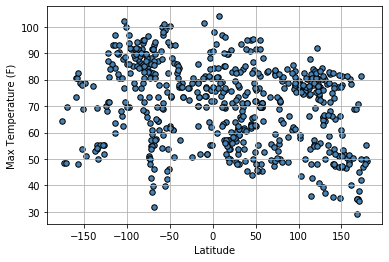

In [101]:
lat_temp_scatter = pd.read_csv('city_dataframe.csv')
lat_temp_scatter

# Ask about the scatterplot outliers and wheather I need format my ticker spacing

x = lat_temp_scatter["Lat"]
y = (lat_temp_scatter["Max Temp"] - 273.15) * 9/5 + 32 

plt.xlabel('Latitude'); plt.ylabel('Max Temperature (F)')

plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolors="black",
            s=30, alpha=1)
plt.grid(b=True, which='major')

## Latitude vs. Humidity Plot

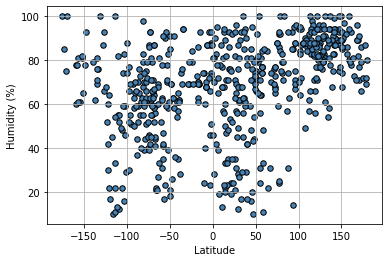

In [104]:
x = lat_temp_scatter["Lat"]
y = lat_temp_scatter["Humidity"] 

plt.xlabel('Latitude'); plt.ylabel('Humidity (%)')

plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolors="black",
            s=30, alpha=1)
plt.grid(b=True, which='major')

## Latitude vs. Cloudiness Plot

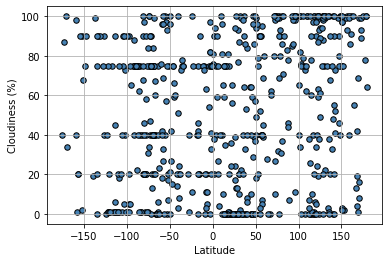

In [103]:
x = lat_temp_scatter["Lat"]
y = lat_temp_scatter["Cloudiness"] 

plt.xlabel('Latitude'); plt.ylabel('Cloudiness (%)')

plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolors="black",
            s=30, alpha=1)
plt.grid(b=True, which='major')

## Latitude vs. Wind Speed Plot

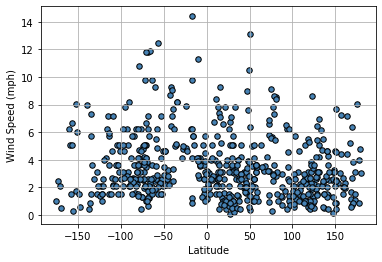

In [102]:
x = lat_temp_scatter["Lat"]
y = lat_temp_scatter["Wind Speed"] 

plt.xlabel('Latitude'); plt.ylabel('Wind Speed (mph)')


plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolors="black",
            s=30, alpha=1)
plt.grid(b=True, which='major')

## Linear Regression

In [113]:
# OPTIONAL: Create a function to create Linear Regression plots
# Want it to work for anything input into the function

def hemi_split(hemisphere_data, latitude):
    if latitude == 'north':
        return hemisphere_data.loc[hemisphere_data['Lat'] > 0]
    elif latitude == 'south':
        return hemisphere_data.loc[hemisphere_data['Lat'] < 0]
    else:
        return print("Please input north or south")
#     x = np.array([hemi_split][north])
#     y = np.array([10.35,12.3,13,14.0,16,17,18.2,20,20.7,22.5])
#     gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
#     mn=np.min(x)
#     mx=np.max(x)
#     x1=np.linspace(mn,mx,500)
#     y1=gradient*x1+intercept

# hemi_split(city_dataframe, 'north')

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,147.92,70.63,275.05,87,100,3.27,RU,1597342597
3,Mataura,168.86,-46.19,274.82,89,1,0.71,NZ,1597342892
6,Bajil,43.29,15.06,305.77,59,64,1.96,YE,1597342892
9,Anito,125.29,12.45,298.17,88,94,2.21,PH,1597342893
10,Farrukhnagar,78.20,17.08,295.15,100,90,3.60,IN,1597342893
...,...,...,...,...,...,...,...,...,...
576,Zyryanka,150.85,65.75,281.60,68,100,4.57,RU,1597342848
578,Ulagan,87.96,50.63,282.51,74,44,0.75,RU,1597343014
579,Sakakah,40.21,29.97,308.15,17,0,5.10,SA,1597343014
581,Dutlwe,23.90,-23.98,287.71,24,0,3.97,BW,1597343014


In [128]:
# Create Northern and Southern Hemisphere DataFrames
# Dataframe is a dataset, running a linear regression, and retrieving metrics from it.
# Latitude runs north and south of the equator
# Use a .loc to filter your latitude
# Think, "What am I trying to do", psudo code it. 
# I have a dataframe of data with lats and lons
# split into north and south
# How do I split the coords
# How do I create a function for linear regression

# n_hemisphere = city_dataframe.loc[city_dataframe['Lat'] > 0]
# s_hemisphere = city_dataframe.loc[city_dataframe['Lat'] < 0]


# def hemi_split(hemisphere_data, latitude):
#     if latitude == 'north':
#         return hemisphere_data.loc[hemisphere_data['Lat'] > 0]
#     elif latitude == 'south':
#         return hemisphere_data.loc[hemisphere_data['Lat'] < 0]
#     else:
#         return print("Please input North or South")

south = hemi_split(city_dataframe, 'south')
north = hemi_split(city_dataframe, 'north')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

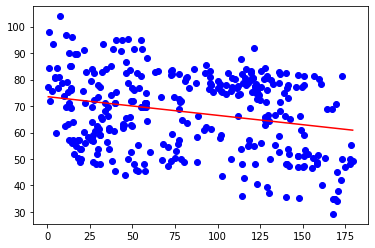

In [122]:
x = np.array(north['Lat'])
y = np.array((north['Max Temp'] - 273.15) * 9/5 + 32)
gradient, intercept, r_value, p_value, std_err = linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

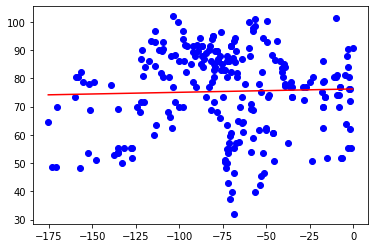

In [127]:
x = np.array(south['Lat'])
y = np.array((south['Max Temp'] - 273.15) * 9/5 + 32)
gradient, intercept, r_value, p_value, std_err = linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

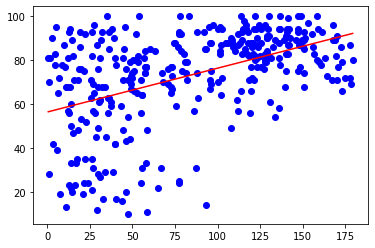

In [129]:
x = np.array(north['Lat'])
y = np.array(north['Humidity'])
gradient, intercept, r_value, p_value, std_err = linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

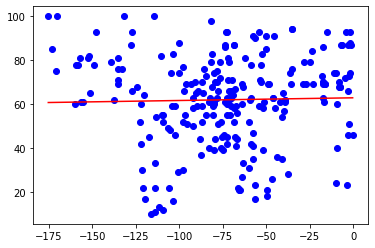

In [130]:
x = np.array(south['Lat'])
y = np.array(south['Humidity'])
gradient, intercept, r_value, p_value, std_err = linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

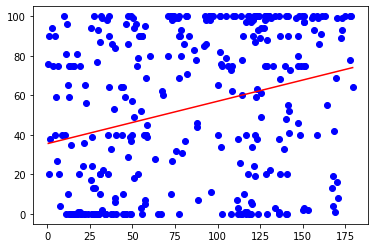

In [131]:
x = np.array(north['Lat'])
y = np.array(north['Cloudiness'])
gradient, intercept, r_value, p_value, std_err = linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

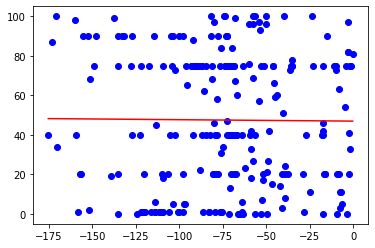

In [132]:
x = np.array(south['Lat'])
y = np.array(south['Cloudiness'])
gradient, intercept, r_value, p_value, std_err = linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

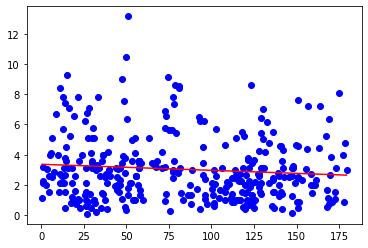

In [133]:
x = np.array(north['Lat'])
y = np.array(north['Wind Speed'])
gradient, intercept, r_value, p_value, std_err = linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

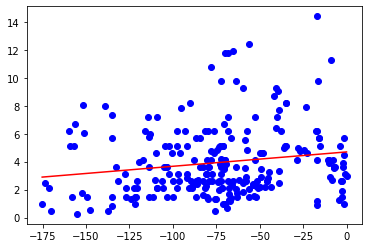

In [134]:
x = np.array(south['Lat'])
y = np.array(south['Wind Speed'])
gradient, intercept, r_value, p_value, std_err = linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()